# K means 

## Preprocessing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df=pd.read_csv('/content/drive/My Drive/SKRIPSI FIX/Dataset/DATA FIX BANGET.csv')
df=pd.read_csv('/content/drive/My Drive/SKRIPSI FIX/Dataset/DATA FINAL FIX BANGET.csv')
df.head(20)

,Source,Destination,Length,Info
0,192168118,192168117,187,Data /ndn/Client1/%C1.Router/router/nlsr/INFO/...
1,192168118,192168117,140,Interest /ndn/Router1/%C1.Router/router/nlsr/I...
2,192168119,192168115,187,Data /ndn/Server3/%C1.Router/router/nlsr/INFO/...
3,192168119,192168115,140,Interest /ndn/Server2/%C1.Router/router/nlsr/I...
4,192168119,192168117,187,Data /ndn/Server3/%C1.Router/router/nlsr/INFO/...
5,192168119,192168117,140,Interest /ndn/Router1/%C1.Router/router/nlsr/I...
6,192168115,192168119,282,Data /ndn/Server2/%C1.Router/router/nlsr/INFO/...
7,192168115,192168119,140,Interest /ndn/Server3/%C1.Router/router/nlsr/I...
8,192168116,192168117,187,Data /ndn/Server1/%C1.Router/router/nlsr/INFO/...
9,192168116,192168117,140,Interest /ndn/Router1/%C1.Router/router/nlsr/I...


In [ ]:
df.dtypes

Source          int64
Destination     int64
Length          int64
Info           object
dtype: object

In [ ]:
df.shape

(5918, 4)

In [ ]:
df_Length=df['Length'].value_counts()
df_Length

140    2950
187    2332
282     329
283     147
281     141
64        6
204       4
60        3
200       3
203       2
280       1
Name: Length, dtype: int64

In [ ]:
df_Length.shape

(11,)

Data Vizualization

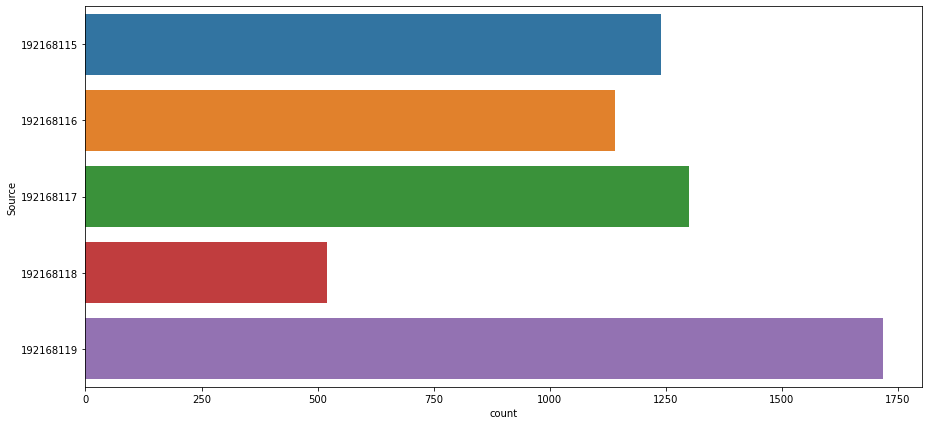

In [ ]:
plt.figure(1 , figsize = (15 , 7))
sns.countplot(y = 'Source' , data = df)
plt.show()

## Preprocessing with K-means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
encoder = LabelEncoder().fit(df['Info'])
df['Info'] = encoder.fit_transform(df['Info'])
df['Info']

0         34
1       2955
2       2625
3       2962
4       2095
        ... 
5913    2959
5914    2904
5915    2962
5916    2047
5917    2963
Name: Info, Length: 5918, dtype: int64

In [ ]:
X = df[['Length' , 'Info']]
X = pd.DataFrame(StandardScaler().fit_transform(X),columns= ['Length' , 'Info'])
#X['Info']= LabelEncoder().fit_transform(df['Info'])
#X['Source']= LabelEncoder().fit_transform(df['Source'])

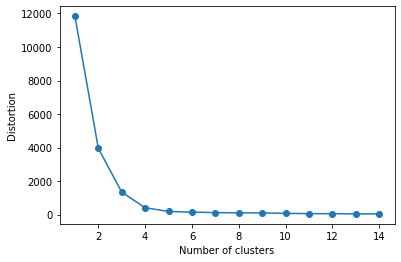

In [ ]:
distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, init='random',n_init=10, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
km = KMeans(n_clusters= 8, init='random',n_init=10, random_state=0)
km.fit(X)
df['klabel'] = km.labels_

In [ ]:
df.head(20)

,Source,Destination,Length,Info,klabel
0,192168118,192168117,187,34,1
1,192168118,192168117,140,2955,7
2,192168119,192168115,187,2625,3
3,192168119,192168115,140,2962,7
4,192168119,192168117,187,2095,3
5,192168119,192168117,140,2957,7
6,192168115,192168119,282,1693,2
7,192168115,192168119,140,2966,7
8,192168116,192168117,187,932,4
9,192168116,192168117,140,2956,7


In [ ]:
df.shape

(5918, 5)

In [ ]:
df['klabel'].value_counts()

7    2950
3     859
2     618
5     394
4     380
0     361
1     347
6       9
Name: klabel, dtype: int64

In [ ]:
km.labels_

array([1, 7, 3, ..., 7, 2, 7], dtype=int32)

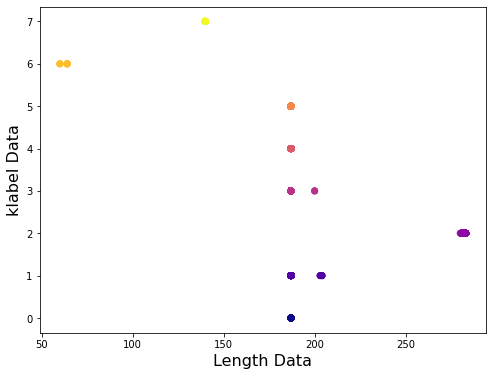

In [ ]:
x_ = df['Length']
y_ = df['klabel']
label = df['klabel']
plt.figure(1 , figsize = (8 , 6) )
plt.xlabel('Length Data', size=16)
plt.ylabel('klabel Data', size=16)
plt.scatter(x_,y_, c = label, cmap='plasma')

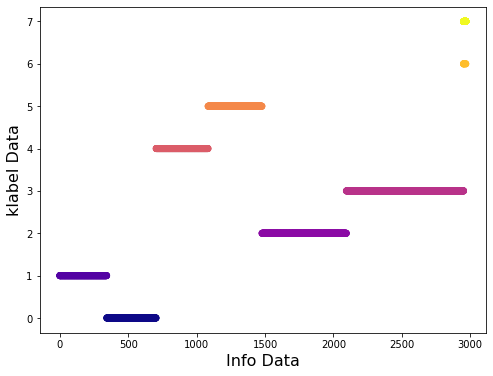

In [ ]:
x_ = df['Info']
y_ = df['klabel']
label = df['klabel']
plt.figure(1 , figsize = (8 , 6) )
plt.xlabel('Info Data', size=16)
plt.ylabel('klabel Data', size=16)
plt.scatter(x_,y_, c = label, cmap='plasma')

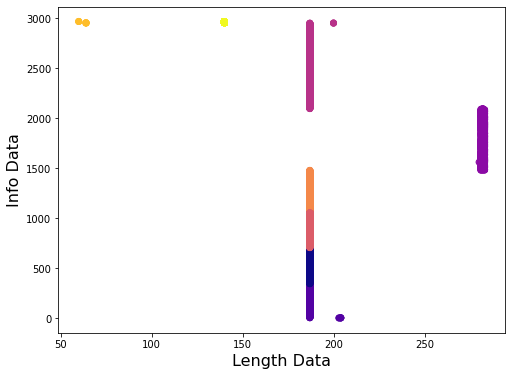

In [ ]:
x_ = df['Length']
y_ = df['Info']
label = df['klabel']
plt.figure(1 , figsize = (8 , 6) )
plt.xlabel('Length Data', size=16)
plt.ylabel('Info Data', size=16)
plt.scatter(x_,y_, c = label, cmap='plasma')

## **EDA**

In [ ]:
df.head(10)

,Source,Destination,Length,Info,klabel
0,192168118,192168117,187,34,1
1,192168118,192168117,140,2955,7
2,192168119,192168115,187,2625,3
3,192168119,192168115,140,2962,7
4,192168119,192168117,187,2095,3
5,192168119,192168117,140,2957,7
6,192168115,192168119,282,1693,2
7,192168115,192168119,140,2966,7
8,192168116,192168117,187,932,4
9,192168116,192168117,140,2956,7


In [ ]:
df.describe()

,Source,Destination,Length,Info,klabel
count,5.918000e+03,5.918000e+03,5918.000000,5918.000000,5918.000000
mean,1.921681e+08,1.921681e+08,173.327138,2217.466712,4.791146
std,1.508632e+00,1.508408e+00,43.370804,957.282549,2.449623
min,1.921681e+08,1.921681e+08,60.000000,0.000000,0.000000
25%,1.921681e+08,1.921681e+08,140.000000,1475.250000,3.000000
50%,1.921681e+08,1.921681e+08,163.500000,2951.500000,5.500000
75%,1.921681e+08,1.921681e+08,187.000000,2960.000000,7.000000
max,1.921681e+08,1.921681e+08,283.000000,2967.000000,7.000000


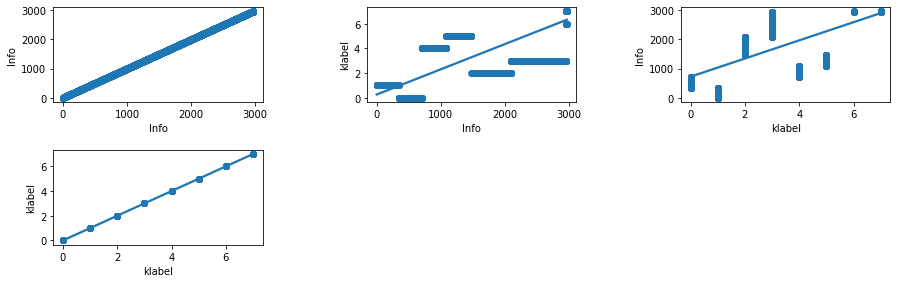

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Info' , 'klabel']:
    for y in ['Info' , 'klabel']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

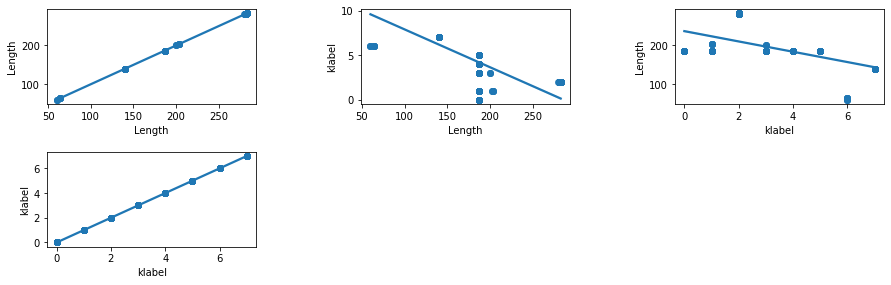

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Length' , 'klabel']:
    for y in ['Length' , 'klabel']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Text(0, 0.5, 'klabel')

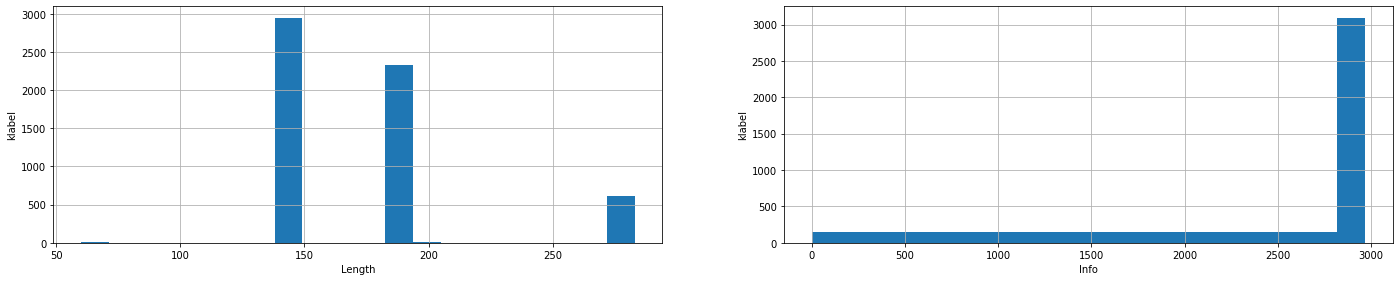

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['Length'].hist(bins=20)
fig.set_xlabel('Length')
fig.set_ylabel('klabel')

plt.subplot(4, 2, 2)
fig = df['Info'].hist(bins=20)
fig.set_xlabel('Info')
fig.set_ylabel('klabel')

# **SVM**

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [ ]:
#X = df.drop(columns = ['Source', 'Destination', 'Protocol', 'klabel', 'Time'])
X = df.drop(columns = ['Source', 'Destination'])
Y = df['klabel']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50, random_state=4)

imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
model = SVC()
model.fit(X_train,Y_train)

SVC()

In [ ]:
pred = model.predict(X_test)
explained_variance_score(pred,Y_test)

0.9451170253951

In [ ]:
accuracy_score(pred,Y_test)

0.9736397431564717

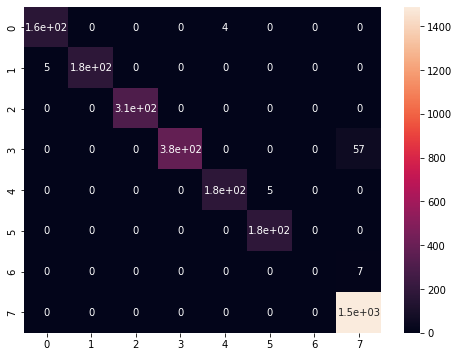

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(Y_test,pred), annot = True)

In [ ]:
print(confusion_matrix(Y_test,pred))

print('\n\nclassification report\n')
print(classification_report(Y_test,pred))

[[ 165    0    0    0    4    0    0    0]
 [   5  175    0    0    0    0    0    0]
 [   0    0  308    0    0    0    0    0]
 [   0    0    0  380    0    0    0   57]
 [   0    0    0    0  180    5    0    0]
 [   0    0    0    0    0  184    0    0]
 [   0    0    0    0    0    0    0    7]
 [   0    0    0    0    0    0    0 1489]]


classification report

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       169
           1       1.00      0.97      0.99       180
           2       1.00      1.00      1.00       308
           3       1.00      0.87      0.93       437
           4       0.98      0.97      0.98       185
           5       0.97      1.00      0.99       184
           6       0.00      0.00      0.00         7
           7       0.96      1.00      0.98      1489

    accuracy                           0.97      2959
   macro avg       0.86      0.85      0.85      2959
weighted avg       0.97      0.97 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
